# Première analyse sur la table
## Exemple pour la région l'Île de France

L'idée est de se faire la main sur le jeu de données pour comprendre nos données et mieux les appréhender pour la suite du projet.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import geopandas as gdp
from shapely.geometry import shape
from shapely.geometry import Point

import missingno as msno 

In [5]:
df= pd.read_csv("wen/data/final_csv/dvf_part_4.csv")

### Ca ressemble à quoi ?

In [ ]:
print(df.shape)
df.tail()

In [3]:
df["l_idpar"]

NameError: name 'df' is not defined

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218527 entries, 0 to 1218526
Data columns (total 64 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   idmutation  1218527 non-null  int64         
 1   idmutinvar  1218527 non-null  object        
 2   idopendata  1218527 non-null  object        
 3   idnatmut    1218527 non-null  int64         
 4   codservch   0 non-null        float64       
 5   refdoc      0 non-null        float64       
 6   datemut     1218527 non-null  datetime64[ns]
 7   anneemut    1218527 non-null  int64         
 8   moismut     1218527 non-null  int64         
 9   coddep      1218527 non-null  int64         
 10  libnatmut   1218527 non-null  object        
 11  nbartcgi    1218527 non-null  int64         
 12  l_artcgi    0 non-null        float64       
 13  vefa        1218527 non-null  object        
 14  valeurfonc  1217615 non-null  float64       
 15  nbdispo     1218527 non-null  in

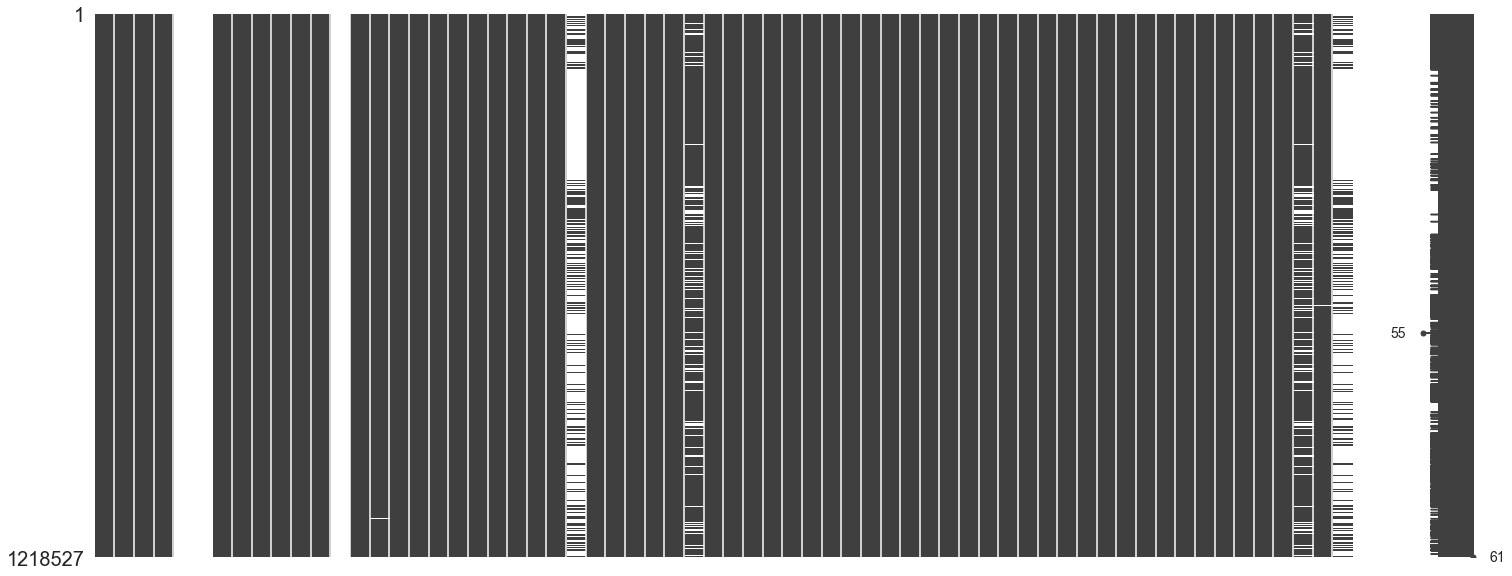

In [12]:
# msno.matrix(df)
# plt.show()

In [6]:
df["idmutation"].nunique()

0

In [105]:
df["datemut"]= pd.to_datetime(df["datemut"], format= "%Y-%m-%d")

print("Date min de mutation {}".format(df["datemut"].min()))
print("Date min de mutation {}".format(df["datemut"].max()))

Date min de mutation 2014-01-02 00:00:00
Date min de mutation 2019-12-31 00:00:00


<Figure size 720x720 with 0 Axes>

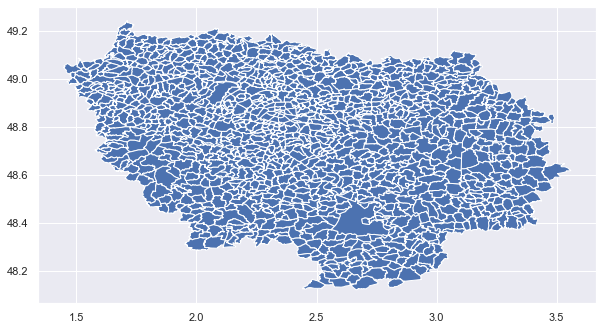

In [22]:
map_ile_de_france= gdp.read_file("data/map/ile_de_france/Communes_IDF.shp")

map_ile_de_france.plot(figsize= (10, 10))

In [107]:
df["geometry"].nunique()

325157

In [140]:
df_copy= df.copy()
df_copy= df_copy.drop(columns= "geometry")
df_copy["geometry"]= df_copy["geometry_y"]
df_copy= df_copy.drop(columns= "geometry_y")

df_copy["geometry"]= df_copy["geometry"].apply(lambda x: wkt.loads(x) if isinstance(x, str) \
                                               else Point(0, 0))
df_geo= gdp.GeoDataFrame(df_copy)
df_geo["geometry"]= np.where(df_geo["geometry"] == Point(0, 0), np.nan, df_geo["geometry"] )
del df_copy
df_geo_copy= df_geo.copy()

In [ ]:
# df_geo_copy.plot()